In [1]:
!pip install pybullet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 5.6 MB/s eta 0:00:00


In [2]:
#you can enable the GPU by changing the runtime
import os
os.environ['MESA_GL_VERSION_OVERRIDE'] = '3.3'
os.environ['MESA_GLSL_VERSION_OVERRIDE'] = '330'
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pylab
from google.colab import widgets
import random
import time

p.connect(p.DIRECT)
#allow to find the assets (URDF, obj, textures etc)
p.setAdditionalSearchPath(pd.getDataPath())

#optionally enable GPU for faster rendering in pybullet.getCameraImage
enableGPU = False
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
import GPUtil as GPU
import sys
# Get all device ids and their processing and memory utiliazion
# (deviceIds, gpuUtil, memUtil) = GPU.getGPUs()

# Print os and python version information
print('OS: ' + sys.platform)
print(sys.version)

# Print package name and version number
print(GPU.__name__ + ' ' + GPU.__version__)

# Show the utilization of all GPUs in a nice table
GPU.showUtilization()

# Show all stats of all GPUs in a nice table
GPU.showUtilization(all=True)

# NOTE: If all your GPUs currently have a memory consumption larger than 1%,
# this step will fail. It's not a bug! It is intended to do so, if it does not
# find an available GPU.
GPUs = GPU.getGPUs()
numGPUs = len(GPU.getGPUs())
print("numGPUs=",numGPUs)
if numGPUs > 0:
  enableGPU = True
eglPluginId = -1
if enableGPU:
  import pkgutil
  egl = pkgutil.get_loader('eglRenderer')
  if (egl):
    eglPluginId = p.loadPlugin(egl.get_filename(), "_eglRendererPlugin")
  else:
    eglPluginId = p.loadPlugin("eglRendererPlugin")

if eglPluginId>=0:
  print("Using GPU hardware (eglRenderer)")
else:
  print("using CPU renderer (TinyRenderer)")

  Preparing metadata (setup.py) ... done
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7392 sha256=a7ad30b092562b34cbfabe94f7bc47f970c43e032891d71e8e080ad2a07af284
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built gputil
OS: linux
3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
GPUtil 1.4.0
| ID | GPU | MEM |
------------------
| ID | Name | Serial | UUID || GPU temp. | GPU util. | Memory util. || Memory total | Memory used | Memory free || Display mode | Display active |
--------------------------------------------------------------------------------------------------------------------------------------------------
numGPUs= 0
using CPU renderer (TinyRenderer)


In [3]:
!git clone https://github.com/Gaianeve/Real_Mega_Fufi.git
%cd Real_Mega_Fufi/Robot/1LegTrail/

Cloning into 'Real_Mega_Fufi'...
remote: Enumerating objects: 882, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (299/299), done.
remote: Total 882 (delta 266), reused 25 (delta 25), pack-reused 557 (from 1)
Receiving objects: 100% (882/882), 8.29 MiB | 18.26 MiB/s, done.
Resolving deltas: 100% (579/579), done.
/content/Real_Mega_Fufi/Robot/1LegTrail


In [4]:

##!! THIS IS THE RIGHT ORDER, DO NOT TOUCH IT OTHERWISE SIMULATION WONT WORK
#reset simulation
p.resetSimulation(p.RESET_USE_DEFORMABLE_WORLD)
p.configureDebugVisualizer(p.COV_ENABLE_GUI)
#tell him to slide freely on the ground plane
useFixedBase = True
plane_pos = [0,0,0]
plane = p.loadURDF("plane.urdf", plane_pos, useFixedBase=useFixedBase)


In [5]:

elastic_joint_position = [0, 0, 0]
elastic_joint_orientation = p.getQuaternionFromEuler([0,np.pi/2,0])
elastic_joint_id = p.loadSoftBody("elastic_joint_steso.obj", \
                                  basePosition = elastic_joint_position,\
                                  baseOrientation = elastic_joint_orientation,\
                                  mass=0.0569, \
                                  useNeoHookean=1, \
                                  NeoHookeanMu=76.92,\
                                  NeoHookeanLambda=115.38, \
                                  NeoHookeanDamping=0.01,\
                                  collisionMargin=0.005,\
                                  useSelfCollision=0,\
                                  frictionCoeff=0.5)

p.configureDebugVisualizer(p.COV_ENABLE_RENDERING, 1)



,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

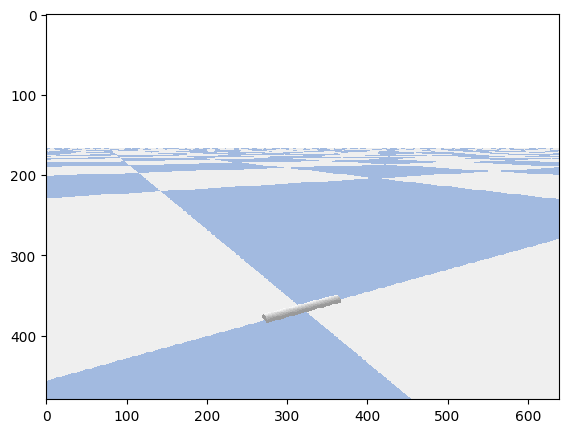

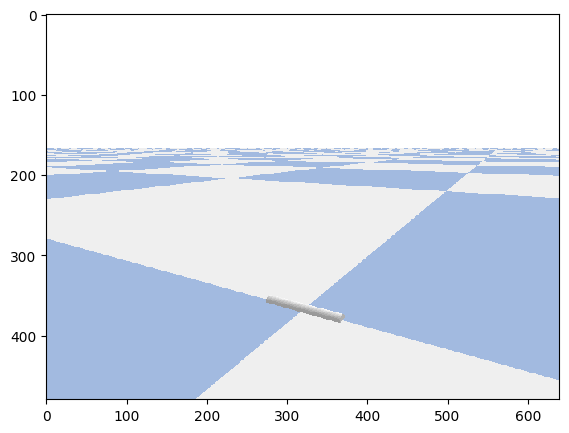

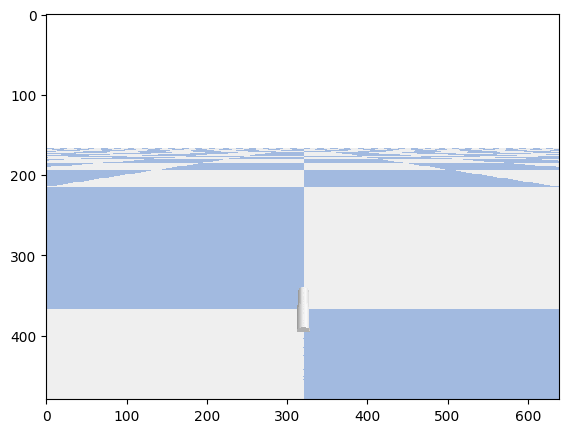

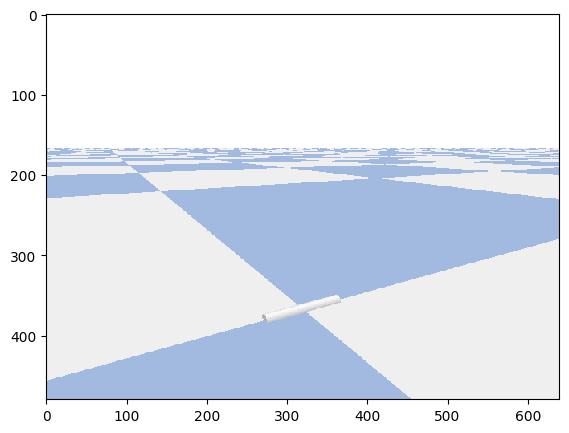

In [6]:


# Parametri della telecamera
camTargetPos = [0, 0, 0.1]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]
p.setGravity(0, 0, -10)

# Visualizzazione 3D della scena con telecamera in più angolazioni
grid = widgets.Grid(2, 2)
yaw = 0
for r in range(2):
    for c in range(2):
        yaw += 60
        with grid.output_to(r, c):
            grid.clear_cell()
            plt.figure(figsize=(10, 5))
            pitch = -10.0
            roll = 0
            upAxisIndex = 2
            camDistance = 0.3
            pixelWidth = 640
            pixelHeight = 480
            nearPlane = 0.01
            farPlane = 100
            fov = 60
            viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch, roll, upAxisIndex)
            aspect = pixelWidth / pixelHeight
            projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)

            img_arr = p.getCameraImage(pixelWidth, pixelHeight, viewMatrix, projectionMatrix)
            w = img_arr[0]  # width of the image, in pixels
            h = img_arr[1]  # height of the image, in pixels
            rgb = img_arr[2]  # color data RGB
            np_img_arr = np.reshape(rgb, (h, w, 4))
            np_img_arr = np_img_arr * (1. / 255.)
            plt.imshow(np_img_arr, interpolation='none', animated=True)

In [ ]:
p.disconnect()